In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 期待収益率、リスク
mu = 0.05
sigma = 0.1

# チャート表示のパラメタ
year = 30
ganpon = 100

# 連続福利収益率の平均標準偏差に変換
s = np.sqrt(np.log(1+(sigma/(1+mu))**2))
r = np.log(1+mu)-(s**2)/2
# ラッパデータ作成
rappa = pd.DataFrame(np.arange(year+1),columns=['year'])
rappa['mean'] = rappa['year']*r
rappa['sd'] = np.sqrt(rappa['year'])*s
rappa['m3'] = ganpon*np.exp(rappa['mean']-3*rappa['sd'])
rappa['m2'] = ganpon*np.exp(rappa['mean']-2*rappa['sd'])
rappa['m1'] = ganpon*np.exp(rappa['mean']-1*rappa['sd'])
rappa['c'] = ganpon*np.exp(rappa['mean']-0*rappa['sd'])
rappa['p1'] = ganpon*np.exp(rappa['mean']+1*rappa['sd'])
rappa['p2'] = ganpon*np.exp(rappa['mean']+2*rappa['sd'])
rappa['p3'] = ganpon*np.exp(rappa['mean']+3*rappa['sd'])

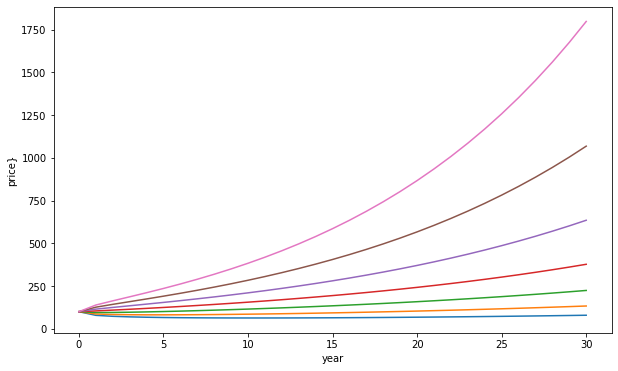

In [9]:
# チャートを表示
rlist = ['m3','m2','m1','c','p1','p2','p3']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, xlabel='year', ylabel='price')

ax.plot(rappa[rlist])

fig.savefig('rappa.png')

In [35]:
# シミュレーション
sim_num = 1000000
ranmat = np.random.normal(r,s,(year,sim_num))
expmat = np.exp(ranmat)
primat = np.cumprod(expmat,axis=0)*ganpon

In [36]:
last_price = primat[year-1,:]

In [37]:
print(np.median(last_price))

377.27454635210216


In [22]:
print(np.power((1+mu),year))

4.321942375150668
